<b> A hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. </b>

## Importing Libraries
Lets import the following libraries that are required for the task:

<ul>
    <li> <b>warnings</b> </li>
    <li> <b>math</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>numpy</b> </li>
</ul>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np

<div id="about_dataset">
    <h2>About the dataset</h2>
    The news dataset <b>Times of India News Headlines</b> is a persistent historical archive of noteable events in the Indian subcontinent from start-2001 to end-2020, recorded in realtime by the journalists of India. It contains approximately 3.4 million events published by Times of India.
    <br>
    <br>
    Times Group as a news agency, reaches out a very wide audience across Asia and drawfs every other agency in the quantity of english articles published per day. The data can be accessed at <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DPQMQH">Times of India News Headlines</a>.
    <br>
    <br>
    Due to the heavy daily volume over multiple years, this data offers a deep insight into Indian society, its priorities, events, issues and talking points and how they have unfolded over time. It is possible to chop this dataset into a smaller piece for a more focused analysis, based on one or more facets.
</div>

In [4]:
news_headlines = pd.read_csv("india-news-headlines.csv", engine='python', on_bad_lines='skip')
news_headlines

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3302588,20200502,city.jaipur,Rajasthan: Four die of Covid-19; 82 more cases...
3302589,20200502,city.noida,Noida: Those without cards given ration too
3302590,20200502,city.delhi,Delhi government retracts order asking doctors...
3302591,20200502,city.ghaziabad,Ghaziabad: Family of woman who died with Covid...


<div id="about_dataset">
    Since our Textual Analysis dataset containing news from Times of India News Headlines is from 2nd January 2001 to 31st December 2020. So we will only work with stock price from 2nd January 2001 to 31st December 2020.
    <br>
    <br>
    We will be using <b>yfinance</b> to extract the stock data of <b>BSE SENSEX</b> from <b>02/01/2001</b> to <b>31/12/2020</b>. The <b>BSE SENSEX</b> is a free-float market-weighted stock market index of 30 well-established and financially sound companies listed on the Bombay Stock Exchange.
</div>

In [15]:
import yfinance as yf
bse_data = yf.download('^BSESN', start='2001-01-02', end='2020-12-31')

[*********************100%***********************]  1 of 1 completed


In [16]:
bse_data.head()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2001-01-02,4018.879883,4028.570068,3929.370117,3953.219971,0
2001-01-03,4060.020020,4067.659912,3977.580078,3977.580078,0
2001-01-04,4115.370117,4180.970215,4109.549805,4180.970215,0
2001-01-05,4183.729980,4195.009766,4115.350098,4116.339844,0
2001-01-08,4120.430176,4206.720215,4101.529785,4164.759766,0


## Pre-processing


Using <b>reset_index</b> to reset the index of the DataFrame, and use the default one instead.

In [17]:
bse_data.reset_index(inplace=True)
bse_data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
0,2001-01-02,4018.879883,4028.570068,3929.370117,3953.219971,0
1,2001-01-03,4060.020020,4067.659912,3977.580078,3977.580078,0
2,2001-01-04,4115.370117,4180.970215,4109.549805,4180.970215,0
3,2001-01-05,4183.729980,4195.009766,4115.350098,4116.339844,0
4,2001-01-08,4120.430176,4206.720215,4101.529785,4164.759766,0


Using <b>dataframe.info()</b> to get a concise summary of both dataframes.

In [18]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (Date, )          4926 non-null   datetime64[ns]
 1   (Close, ^BSESN)   4926 non-null   float64       
 2   (High, ^BSESN)    4926 non-null   float64       
 3   (Low, ^BSESN)     4926 non-null   float64       
 4   (Open, ^BSESN)    4926 non-null   float64       
 5   (Volume, ^BSESN)  4926 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 231.0 KB


In [9]:
news_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302593 entries, 0 to 3302592
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.6+ MB


Using <b>dataframe.isna().any()</b> to checking both dataframes for any null values

In [19]:
bse_data.isna().sum()

,,0
Price,Ticker,
Date,,0
Close,^BSESN,0
High,^BSESN,0
Low,^BSESN,0
Open,^BSESN,0
Volume,^BSESN,0


In [11]:
news_headlines.isna().sum()

,0
publish_date,0
headline_category,0
headline_text,0


### BSESN Data

<ul>
    <li>Dropping duplicates in <b>bse_data</b></li>
    <li>Coverting the datatype of column <b>Date</b> from type <b>object</b> to type <b>datetime</b></li>
    <li>Filtering the important columns i.e. <b>Date, Close, Open, High, Low</b> and <b>Volume</b></li>
    <li>Setting column <b>Date</b> as the index column</li>
    <li>Sorting <b>bse_data</b> according to <b>Date</b></li>
</ul>

In [25]:
import pandas as pd


print(bse_data.head())

Price             Close         Open         High          Low Volume
Ticker           ^BSESN       ^BSESN       ^BSESN       ^BSESN ^BSESN
Date                                                                 
2001-01-02  4018.879883  3953.219971  4028.570068  3929.370117      0
2001-01-03  4060.020020  3977.580078  4067.659912  3977.580078      0
2001-01-04  4115.370117  4180.970215  4180.970215  4109.549805      0
2001-01-05  4183.729980  4116.339844  4195.009766  4115.350098      0
2001-01-08  4120.430176  4164.759766  4206.720215  4101.529785      0


Empty DataFrame
Columns: []
Index: []

### News Headlines

<ul>
    <li>Dropping duplicates in <b>news_headlines</b></li>
    <li>Coverting the datatype of column <b>Date</b> from type <b>object</b> to type <b>datetime</b></li>
    <li>Filtering the important columns i.e. <b>publish_date</b> and <b>headline_text</b></li>
    <li>Grouping the news headlines according to <b>Date</b></li>
    <li>Setting column <b>Date</b> as the index column</li>
    <li>Sorting <b>news_headlines</b> according to <b>Date</b></li>
</ul>

In [26]:
import pandas as pd

news_headlines = news_headlines.drop_duplicates()

news_headlines['publish_date'] = news_headlines['publish_date'].astype(str)
news_headlines['publish_date'] = news_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
news_headlines['publish_date'] = pd.to_datetime(news_headlines['publish_date']).dt.normalize()

news_headlines = news_headlines[['publish_date', 'headline_text']]
# Alternative using filter:
# news_headlines = news_headlines.filter(['publish_date', 'headline_text'])

news_headlines = news_headlines.groupby('publish_date')['headline_text'].apply(lambda x: ','.join(x)).reset_index()

news_headlines.set_index('publish_date', inplace=True)

news_headlines = news_headlines.sort_index(ascending=True)

print(news_headlines.head())

                                                  headline_text
publish_date                                                   
2001-01-02    Status quo will not be disturbed at Ayodhya; s...
2001-01-03    Powerless north India gropes in the dark,Think...
2001-01-04    The string that pulled Stephen Hawking to Indi...
2001-01-05    Light combat craft takes India into club class...
2001-01-06    Light combat craft takes India into club class...


### Combining both Prices and Headlines

<ul>
    <li>Concatenating the datasets: <b>bse_data</b> and <b>news_headlines</b></li>
    <li>Displaying the combined <b>stock_data</b></li>
</ul>

In [28]:
import pandas as pd


bse_data.index = pd.to_datetime(bse_data.index)
news_headlines.index = pd.to_datetime(news_headlines.index)


stock_data = pd.concat([bse_data, news_headlines], axis=1)


stock_data.dropna(axis=0, inplace=True)


print(stock_data.head())


print("\nInfo for combined stock_data:")
stock_data.info()

            (Close, ^BSESN)  (Open, ^BSESN)  (High, ^BSESN)  (Low, ^BSESN)  \
2001-01-02      4018.879883     3953.219971     4028.570068    3929.370117   
2001-01-03      4060.020020     3977.580078     4067.659912    3977.580078   
2001-01-04      4115.370117     4180.970215     4180.970215    4109.549805   
2001-01-05      4183.729980     4116.339844     4195.009766    4115.350098   
2001-01-08      4120.430176     4164.759766     4206.720215    4101.529785   

            (Volume, ^BSESN)  \
2001-01-02               0.0   
2001-01-03               0.0   
2001-01-04               0.0   
2001-01-05               0.0   
2001-01-08               0.0   

                                                headline_text  
2001-01-02  Status quo will not be disturbed at Ayodhya; s...  
2001-01-03  Powerless north India gropes in the dark,Think...  
2001-01-04  The string that pulled Stephen Hawking to Indi...  
2001-01-05  Light combat craft takes India into club class...  
2001-01-08  Sangh 

Adding new columns: <b>[compound, negative, neutral, positive]</b> to <b>stock_data</b> to perform Sentiment Analysis

In [29]:
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,"(Close, ^BSESN)","(Open, ^BSESN)","(High, ^BSESN)","(Low, ^BSESN)","(Volume, ^BSESN)",headline_text,compound,negative,neutral,positive
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...,,,,
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think...",,,,
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...,,,,
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...,,,,
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",,,,


### Importing Libraries to perfrom Sentiment Analysis
Lets import the following libraries that are required for the task:

<ul>
    <li> <b>nltk</b> </li>
    <li> <b>SentimentIntensityAnalyzer</b> from <b>nltk.sentiment.vader</b> </li>
</ul>

Also let's download <b>vader_lexicon</b>

In [30]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<ul>
    <li>Calculating sentiment scores</li>
</ul>

In [31]:
sid = SentimentIntensityAnalyzer()
print('Start calculating sentiment scores:')

stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
print('Compound Done')
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
print('Negative Done')
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
print('Neutral Done')
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
print('Positive Done')
print('Stop')

stock_data.head()

Start calculating sentiment scores:
Compound Done
Negative Done
Neutral Done
Positive Done
Stop


,"(Close, ^BSESN)","(Open, ^BSESN)","(High, ^BSESN)","(Low, ^BSESN)","(Volume, ^BSESN)",headline_text,compound,negative,neutral,positive
2001-01-02,4018.879883,3953.219971,4028.570068,3929.370117,0.0,Status quo will not be disturbed at Ayodhya; s...,-0.9621,0.119,0.817,0.064
2001-01-03,4060.020020,3977.580078,4067.659912,3977.580078,0.0,"Powerless north India gropes in the dark,Think...",0.6322,0.084,0.817,0.098
2001-01-04,4115.370117,4180.970215,4180.970215,4109.549805,0.0,The string that pulled Stephen Hawking to Indi...,0.6648,0.077,0.843,0.080
2001-01-05,4183.729980,4116.339844,4195.009766,4115.350098,0.0,Light combat craft takes India into club class...,0.9253,0.104,0.744,0.152
2001-01-08,4120.430176,4164.759766,4206.720215,4101.529785,0.0,"Sangh Parivar; Babri panel up the ante,Frontru...",-0.9638,0.119,0.855,0.026


<ul>
    <li>Dropping unwanted <b>headline_text</b> and rearranging columns</li>
    <li>Displaying final <b>stock_data<b></li>
</ul>

In [43]:
print("Columns before processing:", stock_data.columns)

# Create a list of the desired column names, using the correct MultiIndex tuples and string names
desired_columns = [('Close', '^BSESN'), 'compound', 'negative', 'neutral', 'positive', ('Open', '^BSESN'), ('High', '^BSESN'), ('Low', '^BSESN'), ('Volume', '^BSESN')]

# Select and reorder the columns to create a new DataFrame
stock_data = stock_data[desired_columns]

# Flatten the MultiIndex columns to simple strings
stock_data.columns = ['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']

stock_data.head()

Columns before processing: Index([ ('Close', '^BSESN'),   ('Open', '^BSESN'),   ('High', '^BSESN'),
          ('Low', '^BSESN'), ('Volume', '^BSESN'),           'compound',
                 'negative',            'neutral',           'positive'],
      dtype='object')


,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2001-01-02,4018.879883,-0.9621,0.119,0.817,0.064,3953.219971,4028.570068,3929.370117,0.0
2001-01-03,4060.020020,0.6322,0.084,0.817,0.098,3977.580078,4067.659912,3977.580078,0.0
2001-01-04,4115.370117,0.6648,0.077,0.843,0.080,4180.970215,4180.970215,4109.549805,0.0
2001-01-05,4183.729980,0.9253,0.104,0.744,0.152,4116.339844,4195.009766,4115.350098,0.0
2001-01-08,4120.430176,-0.9638,0.119,0.855,0.026,4164.759766,4206.720215,4101.529785,0.0


### Feature engineering of the Combined Data

<ul>
    <li>Using <b>dataframe.isna().any()</b> to checking <b>stock_data</b> for any null values</li>
    <li>Using <b>dataframe.describe()</b> to view some basic statistical details like percentile, mean, std etc. of <b>stock_data</b></li>
    <li>Using <b>dataframe.info()</b> to get a concise summary of <b>stock_data</b></li>
</ul>

In [44]:
stock_data.isna().sum()

,0
Close,0
compound,0
negative,0
neutral,0
positive,0
Open,0
High,0
Low,0
Volume,0


In [45]:
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4729.000000,4.729000e+03
mean,17972.269593,-0.873538,0.126853,0.786216,0.086928,17992.164826,18100.461573,17849.596775,8.282144e+04
std,10732.142596,0.447825,0.024309,0.033197,0.021031,10750.573009,10784.869539,10687.607042,1.088301e+06
min,2600.120117,-1.000000,0.000000,0.000000,0.000000,2621.889893,2682.590088,2594.870117,0.000000e+00
25%,8509.559570,-0.999800,0.113000,0.766000,0.076000,8520.480469,8586.429688,8416.889648,9.300000e+03
50%,17400.679688,-0.999100,0.128000,0.782000,0.087000,17422.509766,17526.800781,17276.460938,1.380000e+04
75%,26481.250000,-0.994400,0.142000,0.804000,0.097000,26498.669922,26677.429688,26356.019531,2.080000e+04
max,41952.628906,1.000000,0.444000,1.000000,0.608000,42263.000000,42273.871094,41850.289062,3.181510e+07


In [46]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4729 entries, 2001-01-02 to 2020-04-30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4729 non-null   float64
 1   compound  4729 non-null   float64
 2   negative  4729 non-null   float64
 3   neutral   4729 non-null   float64
 4   positive  4729 non-null   float64
 5   Open      4729 non-null   float64
 6   High      4729 non-null   float64
 7   Low       4729 non-null   float64
 8   Volume    4729 non-null   float64
dtypes: float64(9)
memory usage: 369.5 KB


## Stock Data Analysis

Text(0, 0.5, 'Close Price (INR)')

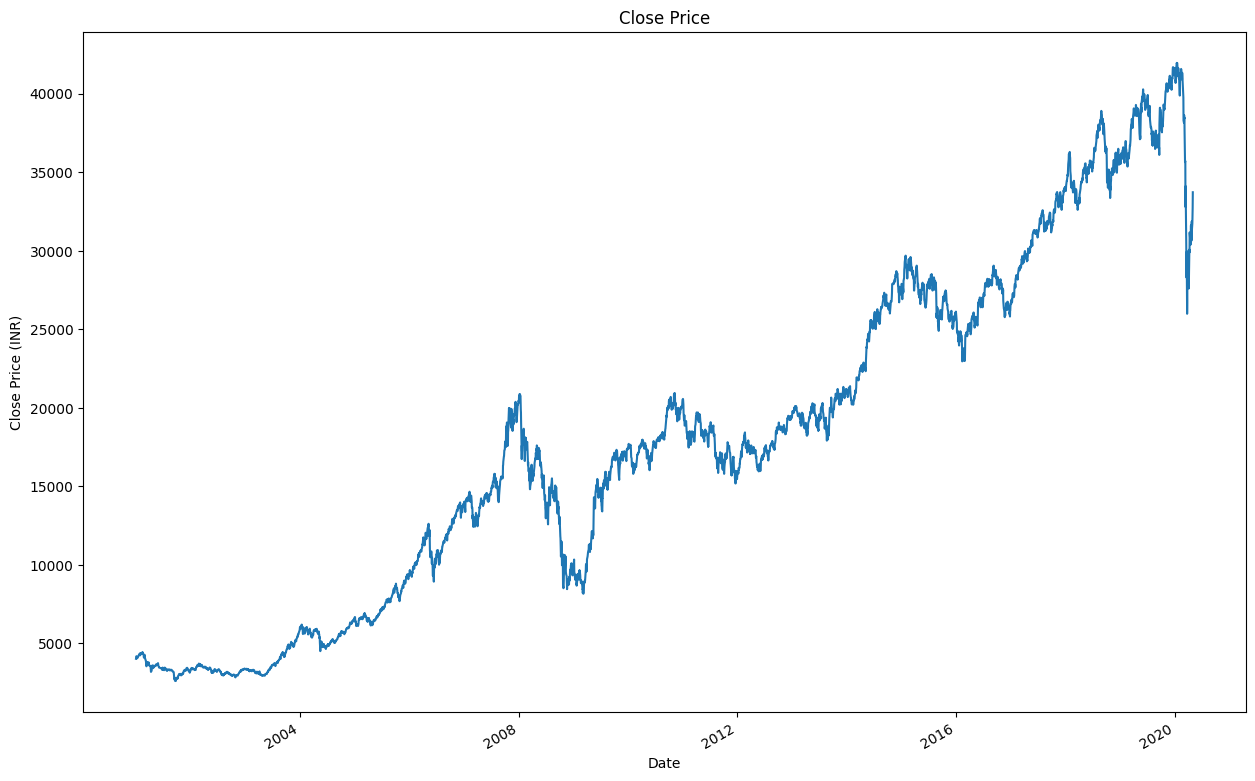

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

stock_data['Close'].plot()


plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

Calculating 7 day rolling mean

In [48]:
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-10,4095.911447,-0.175914,0.121571,0.810143,0.068000,4094.170027,4143.089983,4052.832799,0.0
2001-01-23,4135.598598,0.094314,0.109714,0.818286,0.071714,4140.542899,4184.972831,4101.904227,0.0
2001-01-24,4173.655727,-0.125129,0.111429,0.825000,0.063429,4189.532854,4223.794294,4147.351353,0.0
2001-01-25,4204.348598,-0.360643,0.119857,0.817429,0.062429,4210.514230,4246.702846,4170.801409,0.0


<Axes: >

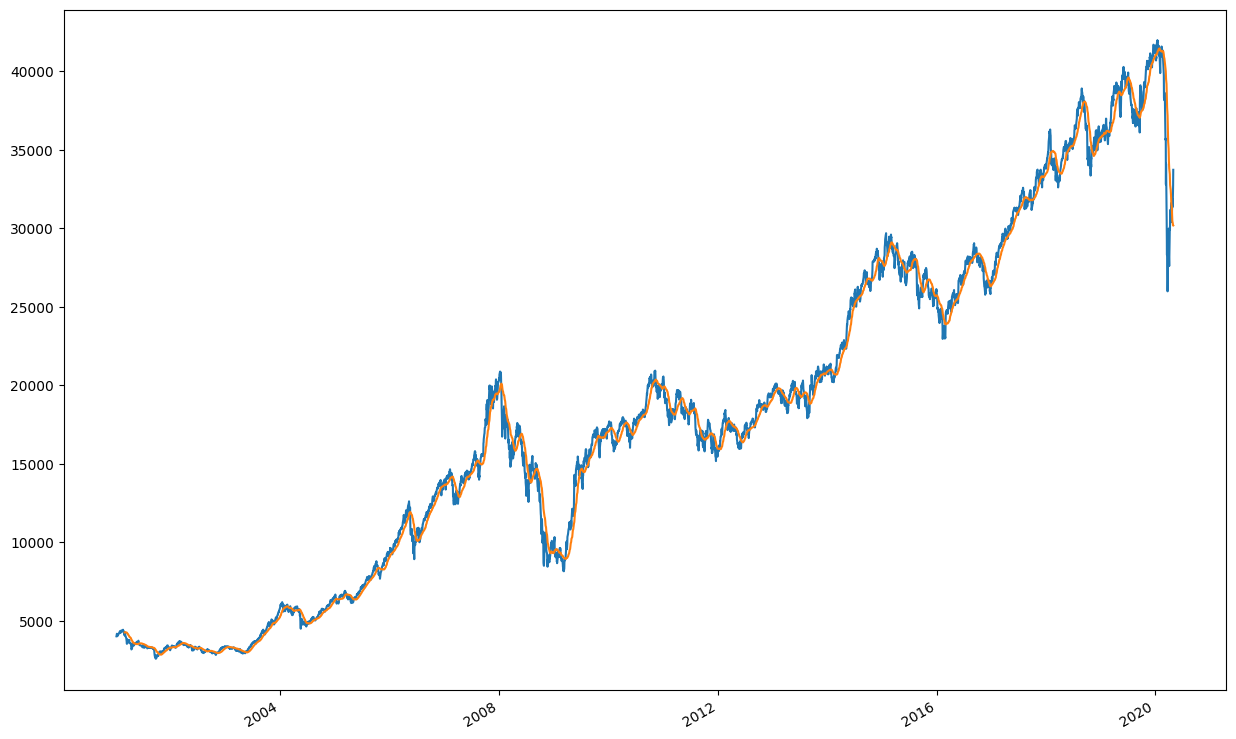

In [49]:
# setting figure size
plt.figure(figsize=(15,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

## Preparing Data For Modelling

In [50]:
# calculating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock_data)-1))

# using 80% of data for training
train_end = int(data_to_use*0.8)
total_data = len(stock_data)
start = total_data - data_to_use

# printing number of records in the training and test datasets
print("Number of records in Training Data:", train_end)
print("Number of records in Test Data:", total_data - train_end)

Number of records in Training Data: 3782
Number of records in Test Data: 947


In [51]:
# predicting one step ahead
steps_to_predict = 1


close_price = stock_data.iloc[start:total_data, stock_data.columns.get_loc('Close')] #close
compound = stock_data.iloc[start:total_data, stock_data.columns.get_loc('compound')] #compound
negative = stock_data.iloc[start:total_data, stock_data.columns.get_loc('negative')] #neg
neutral = stock_data.iloc[start:total_data, stock_data.columns.get_loc('neutral')] #neu
positive = stock_data.iloc[start:total_data, stock_data.columns.get_loc('positive')] #pos
open_price = stock_data.iloc[start:total_data, stock_data.columns.get_loc('Open')] #open
high = stock_data.iloc[start:total_data, stock_data.columns.get_loc('High')] #high
low = stock_data.iloc[start:total_data, stock_data.columns.get_loc('Low')] #low
volume = stock_data.iloc[start:total_data, stock_data.columns.get_loc('Volume')] #volume

# printing close price
print("Close Price:")
close_price

Close Price:


,Close
2001-01-03,4060.020020
2001-01-04,4115.370117
2001-01-05,4183.729980
2001-01-08,4120.430176
2001-01-09,4125.310059
...,...
2020-04-24,31327.220703
2020-04-27,31743.080078
2020-04-28,32114.519531
2020-04-29,32720.160156


In [52]:
# shifting next day close
close_price_shifted = close_price.shift(-1)

# shifting next day compound
compound_shifted = compound.shift(-1)

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']

# dropping nulls
data = data.dropna()
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
2001-01-03,4060.020020,4115.370117,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,4183.729980,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,4120.430176,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,4125.310059,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,4047.639893,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
2001-01-10,4047.639893,4296.689941,-0.5719,0.9295,0.0,4151.580078,4155.859863,4035.439941
2001-01-23,4296.689941,4326.419922,0.9295,-0.9039,0.0,4277.830078,4321.750000,4272.870117
2001-01-24,4326.419922,4330.220215,-0.9039,-0.9838,0.0,4320.509766,4339.410156,4295.709961
2001-01-25,4330.220215,4234.569824,-0.9838,0.9697,0.0,4327.839844,4341.330078,4273.700195
2001-01-29,4234.569824,4372.040039,0.9697,-0.8580,0.0,4158.859863,4262.759766,4158.859863


In [53]:
#close price shifted set as the target var
y = data['close_price_shifted']
y

,close_price_shifted
2001-01-03,4115.370117
2001-01-04,4183.729980
2001-01-05,4120.430176
2001-01-08,4125.310059
2001-01-09,4047.639893
...,...
2020-04-23,31327.220703
2020-04-24,31743.080078
2020-04-27,32114.519531
2020-04-28,32720.160156


In [54]:
# setting the features dataset for prediction
cols = ['close_price', 'compound', 'compound_shifted', 'volume', 'open_price', 'high', 'low']
x = data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
2001-01-03,4060.020020,0.6322,0.6648,0.0,3977.580078,4067.659912,3977.580078
2001-01-04,4115.370117,0.6648,0.9253,0.0,4180.970215,4180.970215,4109.549805
2001-01-05,4183.729980,0.9253,-0.9638,0.0,4116.339844,4195.009766,4115.350098
2001-01-08,4120.430176,-0.9638,-0.9559,0.0,4164.759766,4206.720215,4101.529785
2001-01-09,4125.310059,-0.9559,-0.5719,0.0,4114.740234,4166.839844,4101.009766
...,...,...,...,...,...,...,...
2020-04-23,31863.080078,-0.9991,-0.9982,24400.0,31646.449219,31959.019531,31292.919922
2020-04-24,31327.220703,-0.9982,-0.9988,17600.0,31426.619141,31842.240234,31278.269531
2020-04-27,31743.080078,-0.9988,-0.9976,12900.0,31659.039062,32103.699219,31651.580078
2020-04-28,32114.519531,-0.9976,-0.9700,15600.0,32101.910156,32199.910156,31661.339844


### Importing Libraries to Scale the data
Lets import the following library that is required for the task:

<ul>
    <li> <b>MinMaxScaler</b> from <b>sklearn.preprocessing</b> </li>
</ul>

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# scaling the feature dataset
scaler_x = MinMaxScaler(feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = MinMaxScaler(feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable
x, y

(array([[-0.92580397,  0.6322    ,  0.6648    , ..., -0.93160181,
         -0.93003157, -0.92955317],
        [-0.92299093,  0.6648    ,  0.9253    , ..., -0.92134023,
         -0.92430757, -0.92282952],
        [-0.9195167 ,  0.9253    , -0.9638    , ..., -0.924601  ,
         -0.92359835, -0.92253401],
        ...,
        [ 0.48112336, -0.9988    , -0.9976    , ...,  0.46500182,
          0.48624184,  0.4803923 ],
        [ 0.50000091, -0.9976    , -0.97      , ...,  0.48734585,
          0.49110205,  0.48088954],
        [ 0.53078119, -0.97      , -0.9994    , ...,  0.49789696,
          0.52634615,  0.50688904]]),
 array([[-0.92299093],
        [-0.9195167 ],
        [-0.92273377],
        ...,
        [ 0.50000091],
        [ 0.53078119],
        [ 0.58147483]]))

## Dividing data for training and test datasets

In [58]:
# preparing training and test dataset
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]
y_train = y[0 : train_end]
y_test = y[train_end+1 : len(y)]

# printing the shape of the training and the test datasets
print('Number of rows and columns in Training set X:', X_train.shape, 'and y:', y_train.shape)
print('Number of rows and columns in Test set X:', X_test.shape, 'and y:', y_test.shape)

Number of rows and columns in Training set X: (3782, 7) and y: (3782, 1)
Number of rows and columns in Test set X: (944, 7) and y: (944, 1)


In [59]:
#reshaping dataset
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))


print('Shape of Training set X:', X_train.shape)
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (3782, 7, 1)
Shape of Test set X: (944, 7, 1)


## Creating the Sequential Model

### Importing Libraries to Create Sequential Model
Lets import the following libraries that are required for the task:

<ul>
    <li> <b>Sequential</b> from <b>keras.models</b> </li>
    <li> <b>Dense, LSTM, Dropout, Dense, Activation</b> from <b>keras.layers</b> </li>
</ul>

In [60]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

In [61]:
# seed set to achieve consistent and less random predictions
np.random.seed(2016)

# setting the architecture for the data model
model=Sequential()
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1)))
model.add(Dropout(0.1))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.1))
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, y_train, validation_split=0.2, batch_size=8, epochs=10, verbose=1)

Epoch 1/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - loss: 0.0714 - val_loss: 0.0234
Epoch 2/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 3/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0019 - val_loss: 4.6010e-04
Epoch 4/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0014 - val_loss: 4.4313e-04
Epoch 5/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0013 - val_loss: 3.2617e-04
Epoch 6/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0016 - val_loss: 3.7256e-04
Epoch 7/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 0.0012 - val_loss: 5.9634e-04
Epoch 8/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0010 - val_loss: 4.1736e-04
Epoch 9/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0012 - val_loss: 4.2638e-04
Epoch 10/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0011 - val_loss: 3.6469e-04


In [64]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.weights.h5')
print('Model is saved to the disk')

Model is saved to the disk


## Performing Predictions

In [65]:
predictions = model.predict(X_test)

predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions),1)))

print('Predictions:')
predictions[0:5]

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Predictions:


array([[26974.781],
       [27079.014],
       [26912.322],
       [26675.248],
       [26670.896]], dtype=float32)

<ul>
    <li>Unscaling the test feature dataset: <b>x_test</b> and test y dataset: <b>y_test</b></li>
</ul>

In [66]:
x_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train) , 1)))

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))

## Evaluating The Model

### Importing Libraries to Evaluate The Model
Lets import the following library that is required for the task:

<ul>
    <li> <b>metrics</b> from <b>sklearn</b> </li>
</ul>

In [67]:
from sklearn import metrics

### Evaluating Model using various Metrics

<ul>
    <li><b>Train Loss</b> and <b>Test Loss</b></li>
</ul>

In [68]:
# calculating the training mX_trainsquared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)
# calculating the test mean-squared-error

test_loss = model.evaluate(X_test, y_test, batch_size = 1)
# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss, 4) )
print ('Test Loss =', round(test_loss, 4) )

3782/3782 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 93445984.0000
944/944 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 949313920.0000
Train Loss = 254552224.0
Test Loss = 1174322304.0


<ul>
    <li>Root Mean Square Error </li>
</ul>

In [69]:
# calculating root mean squared error
root_mean_square_error = np.sqrt(np.mean(np.power((y_test- predictions) , 2) ) )
print ('Root Mean Square Error:', round(root_mean_square_error, 4) )

Root Mean Square Error: 581.8922


<ul>
    <li>Root Mean Square Error (sklearn.metrics)</li>
</ul>

In [70]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics):', round(np.sqrt(rmse) , 4))

Root Mean Square Error (sklearn.metrics): 581.8922


<ul>
    <li>Mean Absolute Error (sklearn.metrics)</li>
</ul>

In [71]:
mae = metrics.mean_absolute_error(y_test, predictions)
print('Mean Absolute Error (sklearn.metrics):', round(np.sqrt(mae) , 4))

Mean Absolute Error (sklearn.metrics): 18.8844


<ul>
    <li>R2 Score (sklearn.metrics)</li>
</ul>

In [72]:
r2s = metrics.r2_score(y_test, predictions)
print('R2 Score (sklearn.metrics):', r2s)

R2 Score (sklearn.metrics): 0.9819395619881949


## Plotting the Predicted data against Test data and Saving the Result

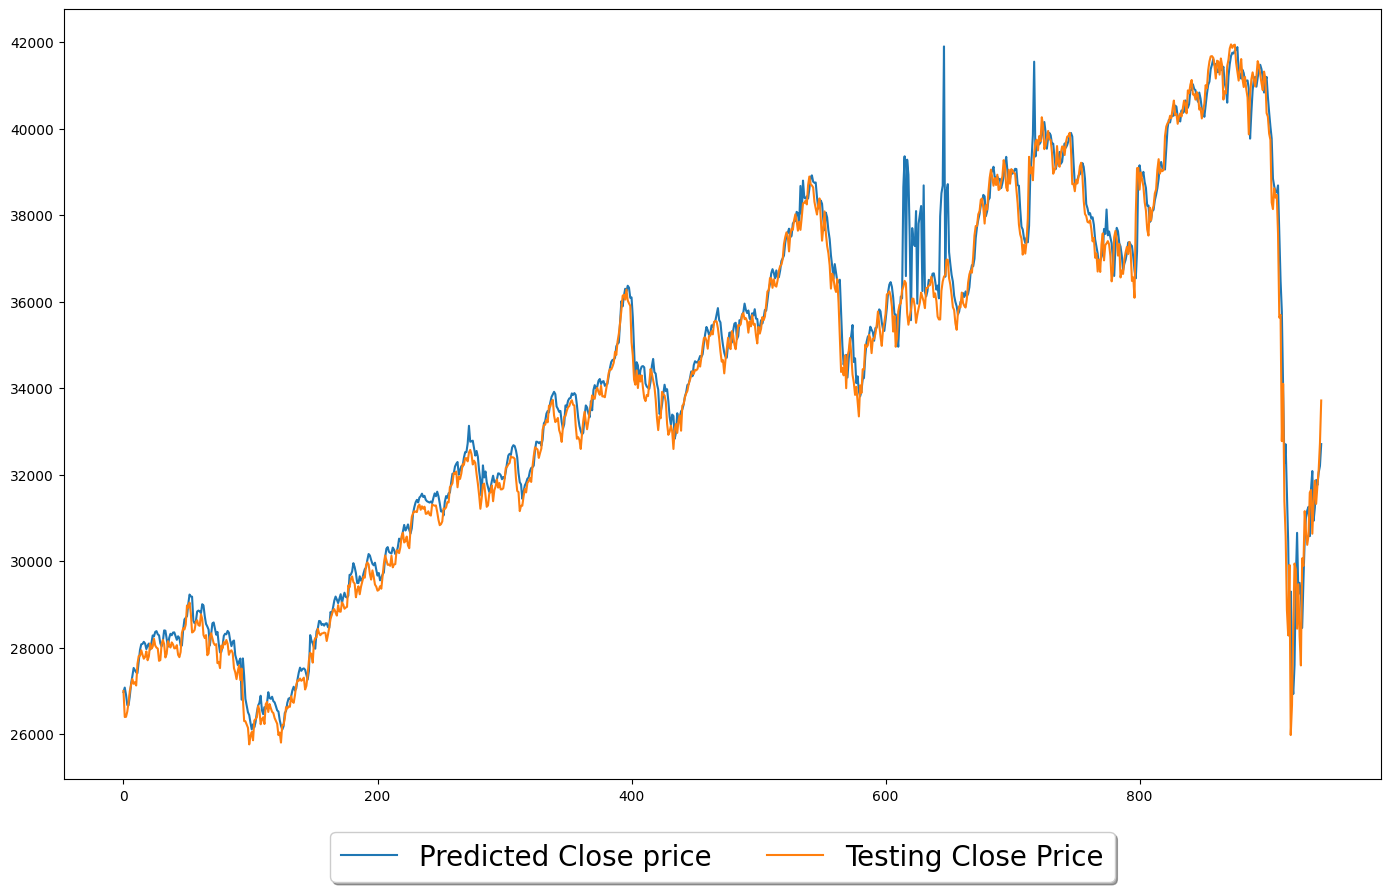

In [73]:
plt.figure(figsize=(17, 10))

plt.plot(predictions, label="Predicted Close price")
plt.plot([row[0] for row in y_test], label = "Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2, prop={'size': 20})
plt.savefig('Stock Price Prediction.jpg')
plt.show()